In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline


TOPO="topo0"
SCHED="rtt"
REP=5


In [199]:
downloads = pd.DataFrame()
for i in range(0,REP):
    d = pd.read_csv("./{topo}-{sched}/download-{i}.csv".format(topo=TOPO, sched=SCHED, i=i))
    d["i"] = i
    downloads = pd.concat([downloads, d])

downloads["mbps"] = downloads["recv_bytes"] * 8 / (1024)/ downloads["elapsed"]


<AxesSubplot: xlabel='i'>

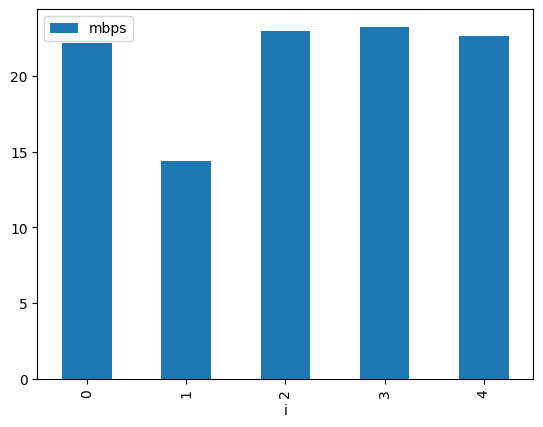

In [200]:
downloads.plot.bar(x="i", y = "mbps")

In [201]:
stats = pd.read_csv("./{}-{}/path-0.csv".format(TOPO, SCHED))

stats.index = pd.to_timedelta(stats["elapsed"], unit="ms")
stats["sent_bits"] = stats["sent_bytes"] * 8
stats.head()

,elapsed,local,remote,sent_bytes,recv_bytes,cwnd,bif,rtt,sent_bits
elapsed,,,,,,,,,
0 days 00:00:01.008000,1008,10.0.3.10:4433,10.0.1.1:5555,1683,357,13500,1683,0,13464
0 days 00:00:01.037000,1037,10.0.3.10:4433,10.0.1.1:5555,15255,1707,13500,13500,13,122040
0 days 00:00:01.049000,1049,10.0.3.10:4433,10.0.1.1:5555,27333,1848,18900,18900,13,218664
0 days 00:00:01.051000,1051,10.0.3.10:4433,10.0.1.1:5555,35433,1895,22950,22950,14,283464
0 days 00:00:01.057000,1057,10.0.3.10:4433,10.0.1.1:5555,42255,1989,27000,27000,14,338040


In [202]:
remote_addr_lte = "10.0.1.1:5555"
remote_addr_wifi = "10.0.2.1:6666"

stats["path"] = "lte"
stats.loc[stats['remote']==remote_addr_wifi, "path"] = "wifi"

In [203]:
stats.head()

,elapsed,local,remote,sent_bytes,recv_bytes,cwnd,bif,rtt,sent_bits,path
elapsed,,,,,,,,,,
0 days 00:00:01.008000,1008,10.0.3.10:4433,10.0.1.1:5555,1683,357,13500,1683,0,13464,lte
0 days 00:00:01.037000,1037,10.0.3.10:4433,10.0.1.1:5555,15255,1707,13500,13500,13,122040,lte
0 days 00:00:01.049000,1049,10.0.3.10:4433,10.0.1.1:5555,27333,1848,18900,18900,13,218664,lte
0 days 00:00:01.051000,1051,10.0.3.10:4433,10.0.1.1:5555,35433,1895,22950,22950,14,283464,lte
0 days 00:00:01.057000,1057,10.0.3.10:4433,10.0.1.1:5555,42255,1989,27000,27000,14,338040,lte


## Throughput and RTT

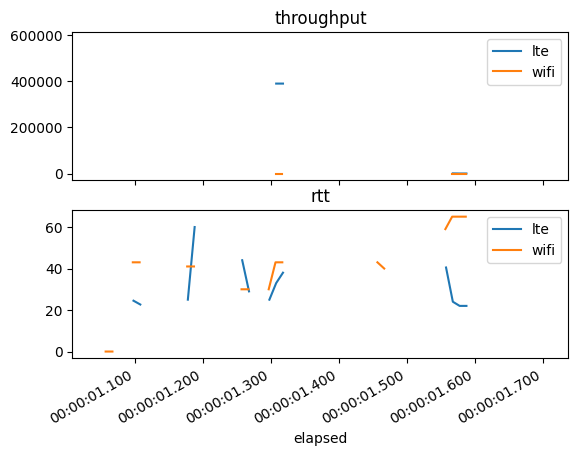

In [204]:
figure,axis =plt.subplots(2,1)


stats[stats["path"] == "lte"]["sent_bits"].resample("10ms").mean().diff().plot(label="lte",ax=axis[0])
stats[stats["path"] == "wifi"]["sent_bits"].resample("10ms").mean().diff().plot(label="wifi",ax=axis[0])
axis[0].legend()
axis[0].set_title("throughput")

stats[stats["path"] == "lte"]["rtt"].resample("10ms").mean().plot(label="lte",ax=axis[1])
stats[stats["path"] == "wifi"]["rtt"].resample("10ms").mean().plot(label="wifi",ax=axis[1])
axis[1].set_title("rtt")
axis[1].legend()
plt.gcf().autofmt_xdate()

## CWND and BIF

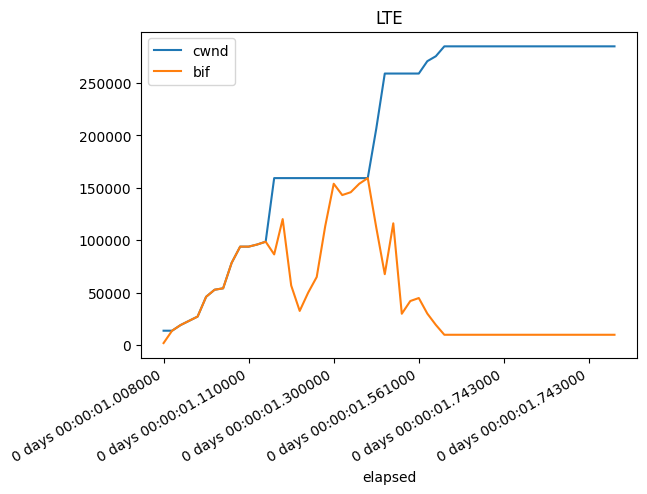

In [205]:
stats[stats["path"] == "lte"].plot(y=["cwnd","bif"])
plt.title("LTE")
plt.legend()
plt.gcf().autofmt_xdate()

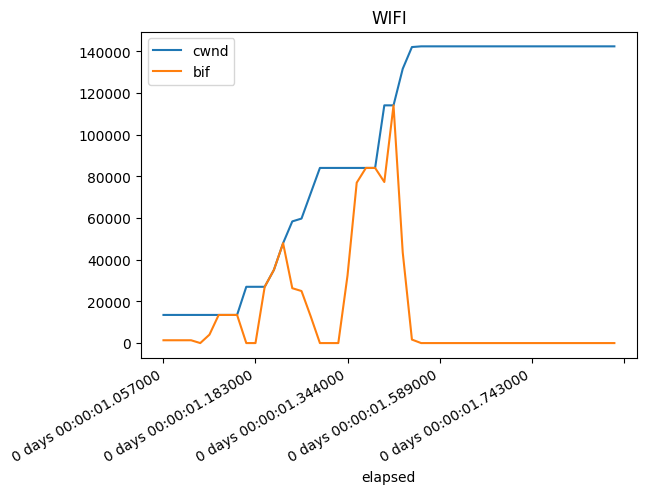

In [206]:
stats[stats["path"] == "wifi"].plot(y=["cwnd","bif"])
plt.title("WIFI")
plt.legend()



## Connection stats

In [207]:
conn = pd.read_csv("./{}-{}/conn-0.csv".format(TOPO, SCHED))

In [208]:
conn.index = pd.to_timedelta(conn["elapsed"], unit="ms")

Text(0.5, 1.0, 'Lost bytes')

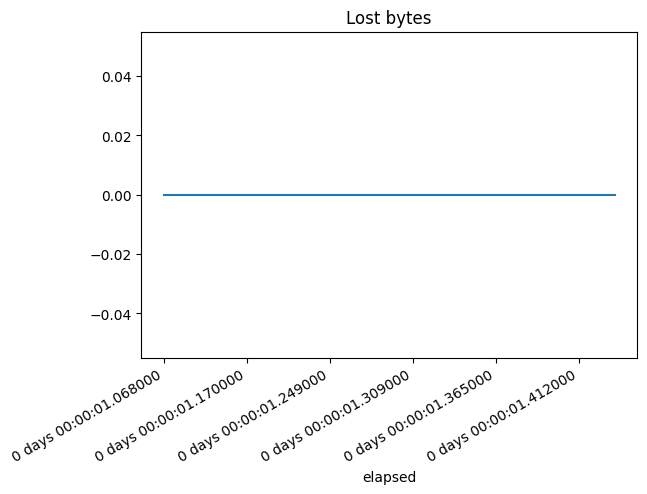

In [209]:
conn["lost_bytes_total"].plot()
plt.title("Lost bytes")


Text(0.5, 1.0, 'Sent bytes total')

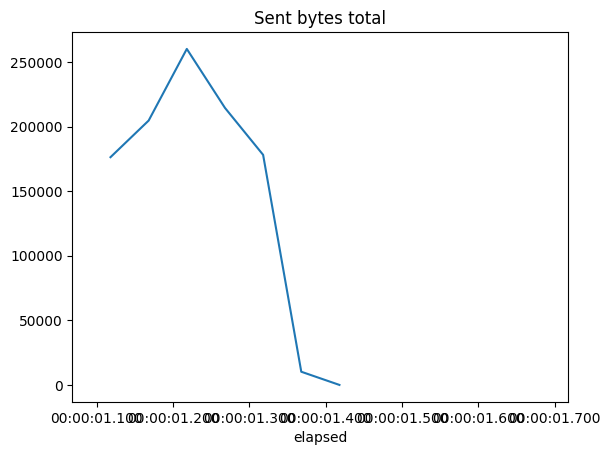

In [210]:
conn["sent_bytes_total"].resample("50ms").mean().diff().plot()
plt.title("Sent bytes total")

Text(0.5, 1.0, 'Burstiness')

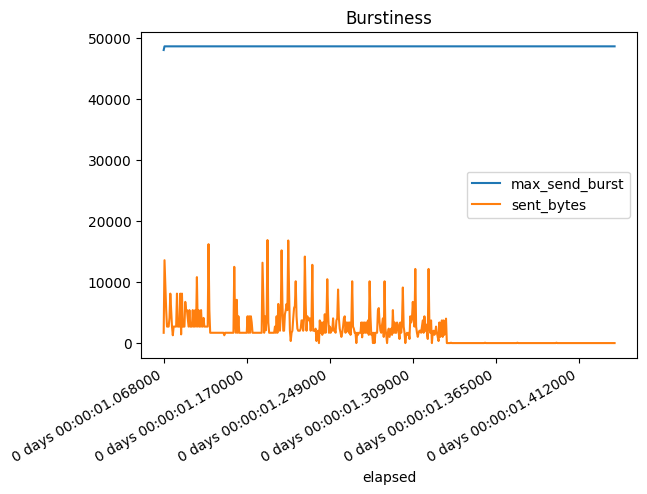

In [211]:
conn[["max_send_burst","sent_bytes"]].plot()
plt.title("Burstiness")

<AxesSubplot: xlabel='elapsed'>

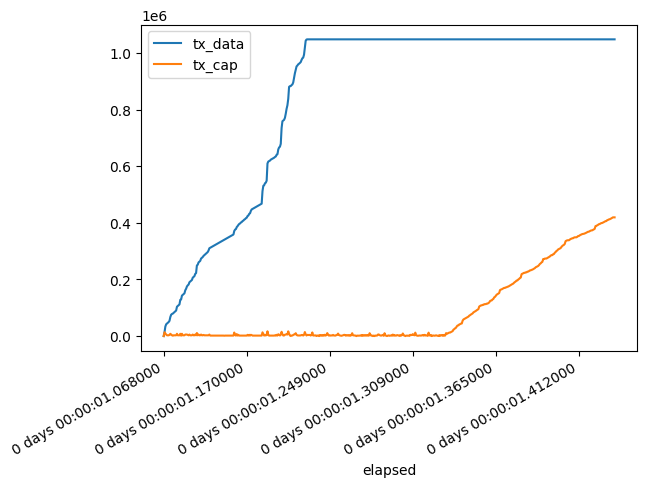

In [212]:
conn[["tx_data", "tx_cap"]].plot()

<AxesSubplot: xlabel='elapsed'>

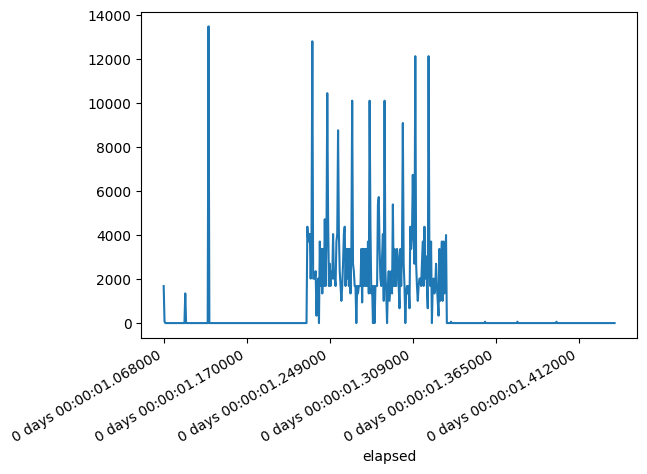

In [213]:
(-conn["stream_written"] + conn["sent_bytes"]).plot()

In [214]:
conn["stream_written"].sum()

613059

In [215]:
conn["sent_bytes"].sum()

1099794